#### CHAPTER 8
# 차원 축소

1. PCA
2. 커널 PCA
3. LLE
4. 다른 차원 축소 기법


In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## PCA
### 주성분 분석
: 가장 인기 있는 차원 축소 알고리즘으로, 데이터에 가장 가까운 초평면을 정의한 후 데이터를 이 평면에 투영시키는 방법
- 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환함
- 다른 방식으로 말하면 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화 하는 축을 찾는 것
- PCA의 목적은 바로 이런 새 기저(축)을 찾아내는 것
![nn1](http://i.imgur.com/Uv2dlsH.gif)
![nn2](https://render.githubusercontent.com/render/math?math=X%20%3D%20U%20%5Csum%20V%5ET&mode=inline) 에서 $V$가 주성분
 - (m, m) (m, n) (n, n) <m: 샘플 개수, n: 특성 개수>
 

In [11]:
#SVD() 함수를 이용하여 훈련 세트의 모든 주성분을 구한 후 처음 두개의 PC를 정의하는 두개의 단위 벡터 추출
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [12]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [13]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [14]:
#첫 두개의 주성분으로 정의된 평면에 훈련 세트 투영
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [15]:
X2D_using_svd = X2D

In [16]:
X2D_using_svd

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

In [17]:
#사이킷런
#PCA 모델을 사용하여 데이터셋의 차워능ㄹ 2로 줄이는 코드
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [20]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [18]:
pca.components_.T[:, 0] #첫번째 주성분 정의하는 단위벡터

array([-0.93636116, -0.29854881, -0.18465208])

In [19]:
pca.explained_variance_ratio_ #주성분의 설명된 분산의 비율

array([0.84248607, 0.14631839])

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
#차원 축소 하지 않고 PCA 계산
#훈련 세트의 분산을 95%로 유지하는데 필요한 최소한의 차원의 수 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [24]:
#n_components=d 설정하여 PCA 다시 실행
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

In [25]:
pca.n_components_

154

In [26]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

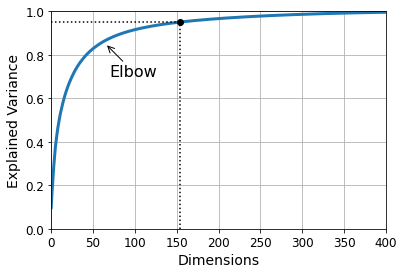

In [27]:
#설명된 분산~ 차원 수에 대한 함수 그래프
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42) #svd_solver의 기본값: "auto"
X_reduced = rnd_pca.fit_transform(X_train)

#### 점진적 PCA
: 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입 

In [28]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch) #미니 배치마다 호출  #fit()는 전체 훈련 세트에 사용하는 것

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [29]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [34]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

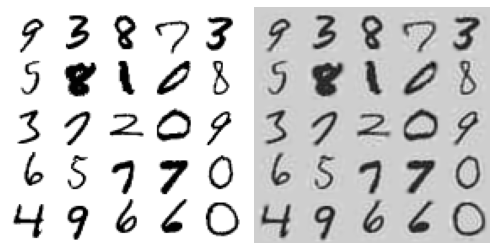

In [35]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [36]:
X_reduced_inc_pca = X_reduced

In [37]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [39]:
X_reduced_pca = X_reduced

In [40]:
# 평균 비교
np.allclose(X_reduced_pca, X_reduced_inc_pca)

True

In [41]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

True

#### memmap()

In [42]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [43]:
del X_mm

In [44]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm) #일반적인 fit(0) 매소드

IncrementalPCA(batch_size=525, n_components=154)

In [45]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 커널 PCA
: 차원 축소를 위한 복잡한 비선형 투형 수행
- 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋 펼칠 때 유용

In [47]:
#사이킷런 #PBF 커널 #kPCA 적용
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

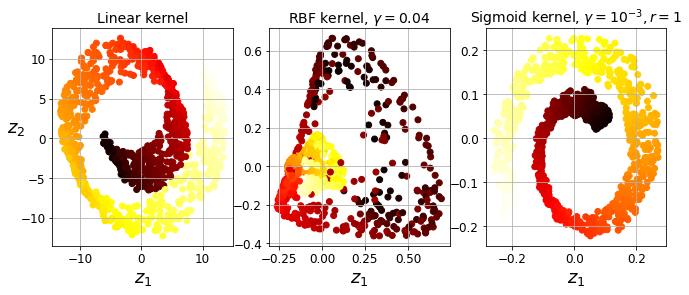

In [48]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


plt.show()

#### 커널선택과 하이퍼파라미터 튜닝

**kPCA**
- 비지도 학습
- 명확한 성능 측정 기준 없음

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [50]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [51]:
from sklearn.metrics import mean_squared_error
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)


mean_squared_error(X, X_preimage)

8.379989234336291e-27

## LLE
- 지역 선형 임베딩
- 비선형 차원 축소
- 투영에 의존하지 않는 매니폴드 학습

In [52]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [53]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

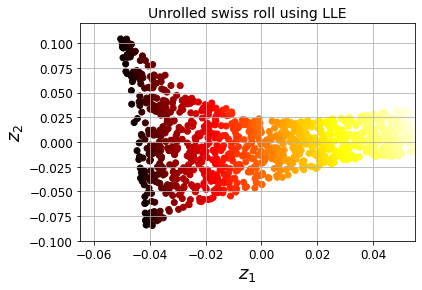

In [54]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)


plt.show()

## 다른 차원 축소 기법

랜덤 투영
: 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
- 차원 축소 품질은 샘플 수와 목표 차원수에 따라 다름

다차원 스케일링(MDS)
: 샘플간의 거ㅓ리를 보전하면서 차원 축소

lsomap
: 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만듦(지오데식 거리 유지)

t-SNE
: 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원 축소

선형 판별 분선(LDA)
: 분류 알고리즘으로 투영을 통해 가능한 한 클래스를 멀리 떨어지게 되는데 SVM같은 다른 분류 화장품을 적용하기 전에 차원을 축소시키는데 좋음


In [55]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [56]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [57]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

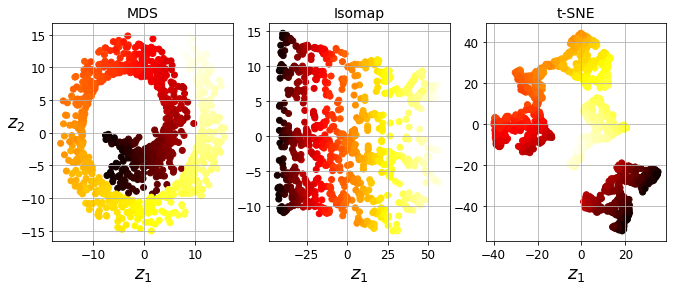

In [59]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


plt.show()